In [1]:
import xarray as xr
import pandas as pd
import glob

import pvdeg

In [27]:
path="/projects/inspire/PySAM-MAPS/Full-Outputs/illinois/01/"
csv_ext="*.csv"
nc_ext="*.nc"


files = glob.glob(path + csv_ext)
files.sort() # sort inplace
meta_list = [pd.read_csv(file, index_col=0) for file in files]

meta_df = pd.concat(meta_list)


In [28]:
meta_df

,latitude,longitude,altitude,tz,country,state,county,wind_height
814870,40.21,-91.50,149,-6,United States,Illinois,Hancock,2
814871,40.17,-91.50,147,-6,United States,Illinois,Adams,2
814872,40.13,-91.50,146,-6,United States,Illinois,Adams,2
814873,40.09,-91.50,154,-6,United States,Illinois,Adams,2
815750,40.33,-91.46,154,-6,United States,Illinois,Hancock,2
...,...,...,...,...,...,...,...,...
915168,42.49,-87.06,175,-6,United States,Illinois,Lake Michigan,2
915169,42.45,-87.06,175,-6,United States,Illinois,Lake Michigan,2
915170,42.41,-87.06,175,-6,United States,Illinois,Lake Michigan,2
915171,42.37,-87.06,175,-5,United States,Illinois,Lake Michigan,2


In [29]:
stacked = xr.open_mfdataset(path + nc_ext, chunks={})

stacked

<xarray.Dataset> Size: 15GB
Dimensions:              (gid: 9949, time: 8760, distance: 10)
Coordinates:
  * time                 (time) datetime64[ns] 70kB 2001-01-01 ... 2001-12-31...
  * gid                  (gid) int64 80kB 814870 814871 814872 ... 915171 915992
  * distance             (distance) int64 80B 0 1 2 3 4 5 6 7 8 9
Data variables: (12/17)
    subarray1_poa_rear   (gid, time) float64 697MB dask.array<chunksize=(320, 8760), meta=np.ndarray>
    temp_air             (gid, time) float64 697MB dask.array<chunksize=(320, 8760), meta=np.ndarray>
    pitch                (gid) float64 80kB dask.array<chunksize=(320,), meta=np.ndarray>
    tilt                 (gid) float64 80kB dask.array<chunksize=(320,), meta=np.ndarray>
    subarray1_poa_front  (gid, time) float64 697MB dask.array<chunksize=(320, 8760), meta=np.ndarray>
    albedo               (gid, time) float64 697MB dask.array<chunksize=(320, 8760), meta=np.ndarray>
    ...                   ...
    relative_humidity    (gid, time) float64 697MB dask.array<chunksize=(320, 8760), meta=np.ndarray>
    wind_speed           (gid, time) float64 697MB dask.array<chunksize=(320, 8760), meta=np.ndarray>
    annual_poa           (gid) float64 80kB dask.array<chunksize=(320,), meta=np.ndarray>
    ground_irradiance    (gid, time, distance) float64 7GB dask.array<chunksize=(320, 8760, 10), meta=np.ndarray>
    dhi                  (gid, time) float64 697MB dask.array<chunksize=(320, 8760), meta=np.ndarray>
    dni                  (gid, time) float64 697MB dask.array<chunksize=(320, 8760), meta=np.ndarray>

In [30]:
meta_df

,latitude,longitude,altitude,tz,country,state,county,wind_height
814870,40.21,-91.50,149,-6,United States,Illinois,Hancock,2
814871,40.17,-91.50,147,-6,United States,Illinois,Adams,2
814872,40.13,-91.50,146,-6,United States,Illinois,Adams,2
814873,40.09,-91.50,154,-6,United States,Illinois,Adams,2
815750,40.33,-91.46,154,-6,United States,Illinois,Hancock,2
...,...,...,...,...,...,...,...,...
915168,42.49,-87.06,175,-6,United States,Illinois,Lake Michigan,2
915169,42.45,-87.06,175,-6,United States,Illinois,Lake Michigan,2
915170,42.41,-87.06,175,-6,United States,Illinois,Lake Michigan,2
915171,42.37,-87.06,175,-5,United States,Illinois,Lake Michigan,2


In [31]:
coords_ds = pvdeg.utilities.gids_dataset_to_coords_dataset(stacked, meta_df)

/home/tford/.conda-envs/geospatial/lib/python3.9/site-packages/xarray/util/deprecation_helpers.py:140: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explicitly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  return func(*args, **kwargs)


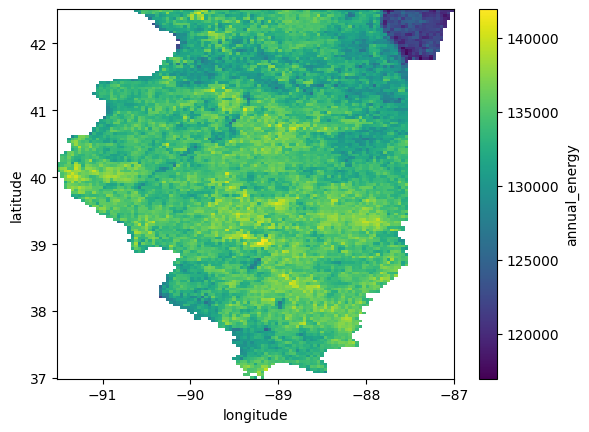

In [32]:
coords_ds.annual_energy.plot()

In [17]:
meta_list[0]

,latitude,longitude,altitude,tz,country,state,county,wind_height
393330,40.49,-108.90,1763,-7,United States,Colorado,Moffat,2
393331,40.45,-108.90,1793,-7,United States,Colorado,Moffat,2
393332,40.41,-108.90,2280,-7,United States,Colorado,Moffat,2
393333,40.37,-108.90,2320,-7,United States,Colorado,Moffat,2
393334,40.33,-108.90,2463,-7,United States,Colorado,Moffat,2
...,...,...,...,...,...,...,...,...
395958,39.89,-108.78,1910,-7,United States,Colorado,Rio Blanco,2
395959,39.85,-108.78,1937,-7,United States,Colorado,Rio Blanco,2
395960,39.81,-108.78,1904,-7,United States,Colorado,Rio Blanco,2
395961,39.77,-108.78,1978,-7,United States,Colorado,Rio Blanco,2


In [ ]:
coords_ds = pvdeg.utilities.gids_dataset_to_coords_dataset(stacked, meta_df)